**KDDM Final Project on Banking Dataset classification**

---

**Problem Statement :**
There has been a revenue decline in the Portuguese Bank and they would like to know what actions to take. After investigation, they found that the root cause was that their customers are not investing enough for long term deposits. So the bank would like to identify existing customers that have a higher chance to subscribe for a long term deposit and focus marketing efforts on such customers.
The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed.

**Importing Libraries**

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.impute import KNNImputer
from imblearn.under_sampling import EditedNearestNeighbours

In [2]:
from sklearn.metrics import *
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

In [3]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

In [5]:
data = pd.read_csv(r'/content/new_train.csv')
print(data.head())

   age           job   marital          education  default housing loan  \
0   49   blue-collar   married           basic.9y  unknown      no   no   
1   37  entrepreneur   married  university.degree       no      no   no   
2   78       retired   married           basic.4y       no      no   no   
3   36        admin.   married  university.degree       no     yes   no   
4   59       retired  divorced  university.degree       no      no   no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   nov         wed       227         4    999         0   
1  telephone   nov         wed       202         2    999         1   
2   cellular   jul         mon      1148         1    999         0   
3  telephone   may         mon       120         2    999         0   
4   cellular   jun         tue       368         2    999         0   

      poutcome    y  
0  nonexistent   no  
1      failure   no  
2  nonexistent  yes  
3  nonexistent   no  
4  nonexiste

**Information of Training Dataset**

---

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB
None


In [7]:
print(data.describe())

                age      duration      campaign         pdays      previous
count  32950.000000  32950.000000  32950.000000  32950.000000  32950.000000
mean      40.014112    258.127466      2.560607    962.052413      0.174719
std       10.403636    258.975917      2.752326    187.951096      0.499025
min       17.000000      0.000000      1.000000      0.000000      0.000000
25%       32.000000    103.000000      1.000000    999.000000      0.000000
50%       38.000000    180.000000      2.000000    999.000000      0.000000
75%       47.000000    319.000000      3.000000    999.000000      0.000000
max       98.000000   4918.000000     56.000000    999.000000      7.000000


In [8]:
print(data.isnull().sum())

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64


In [9]:
print(data.shape)

(32950, 16)


In [10]:
cat_features = [i for i in data.columns if data.dtypes[i]=='object']

In [11]:
print(cat_features)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


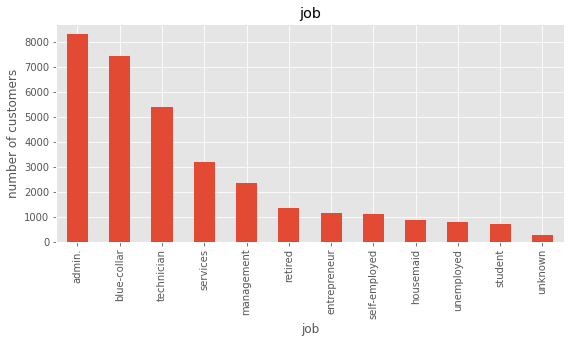

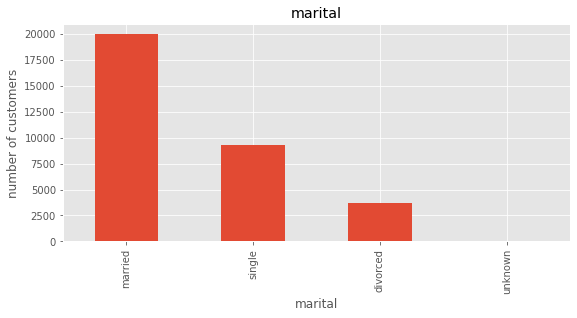

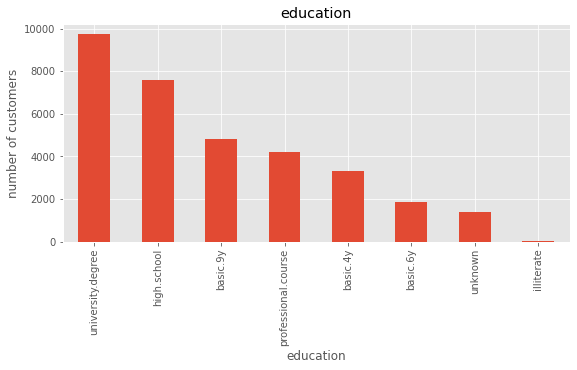

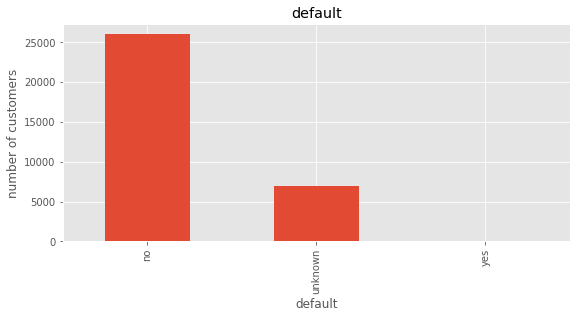

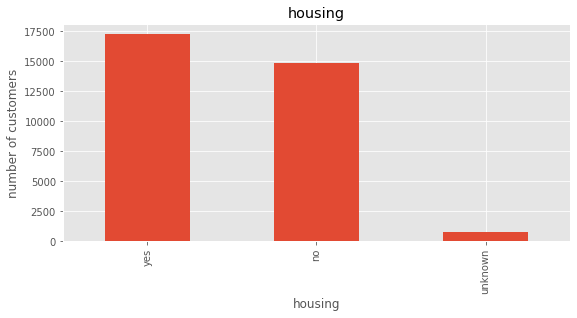

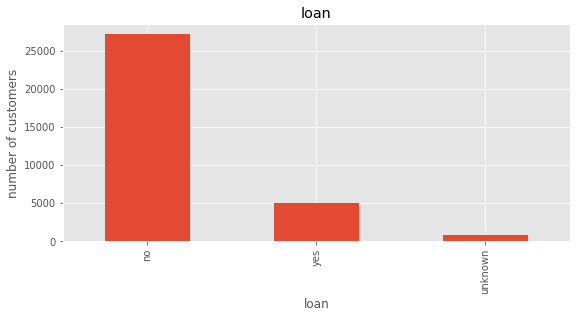

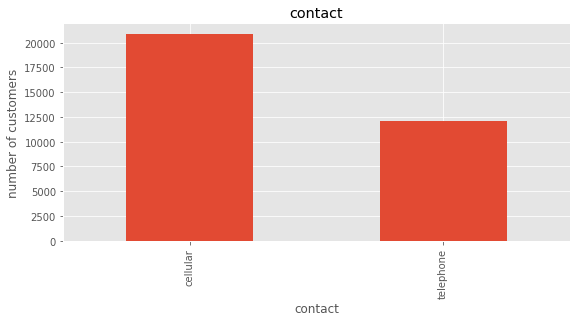

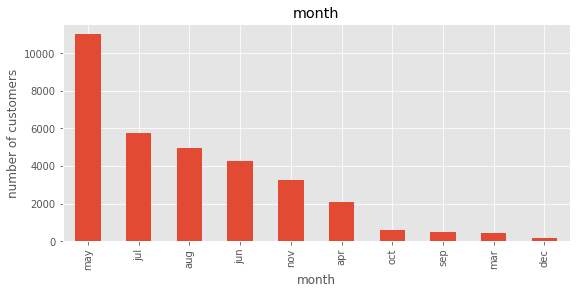

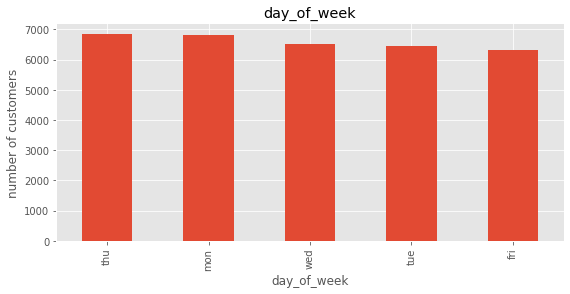

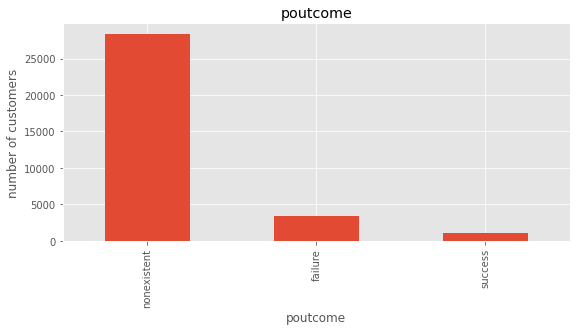

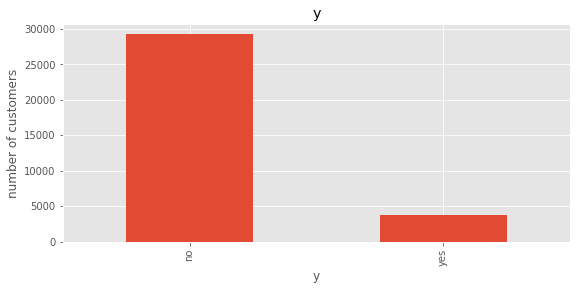

In [12]:
# plotting bar chart for each categorical variable
plt.style.use("ggplot")

for column in cat_features:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    data[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)

In [13]:
data = data.replace( 'unknown', np.nan)

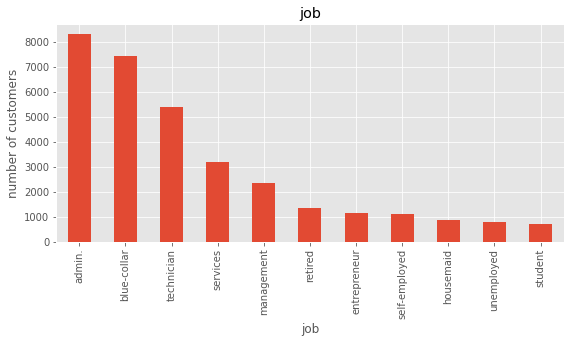

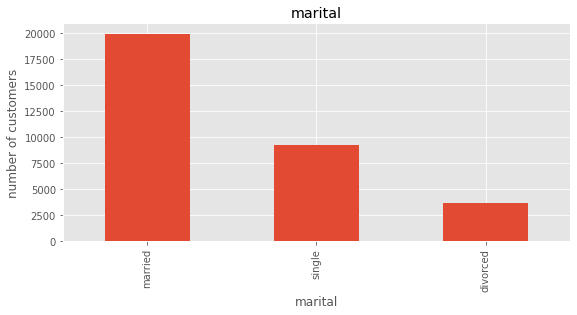

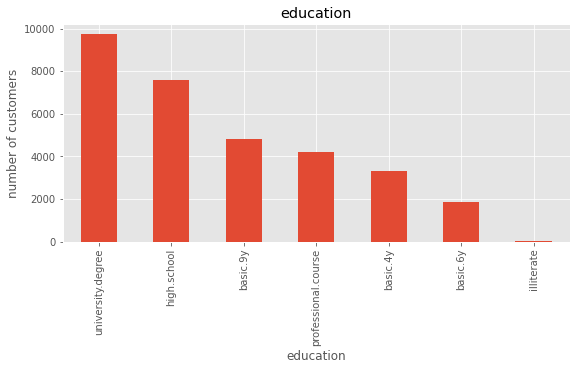

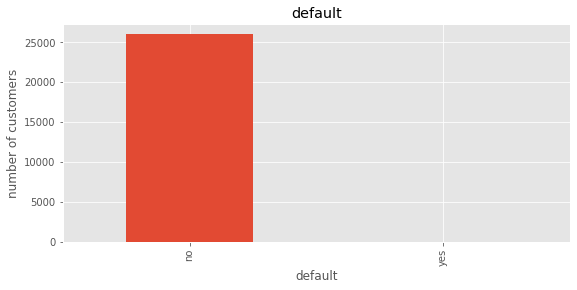

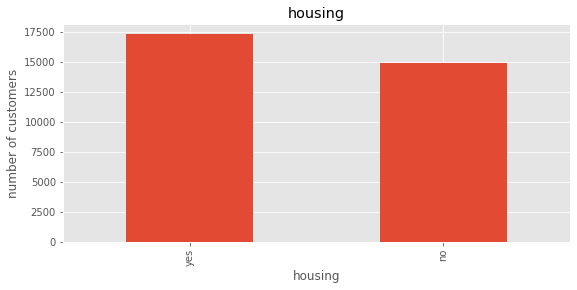

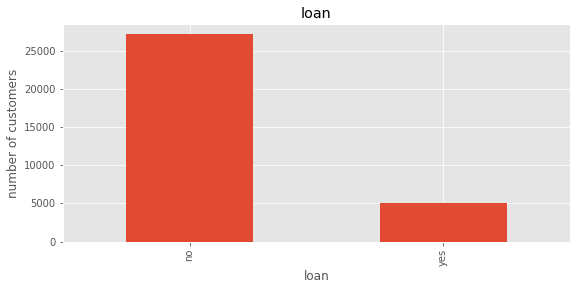

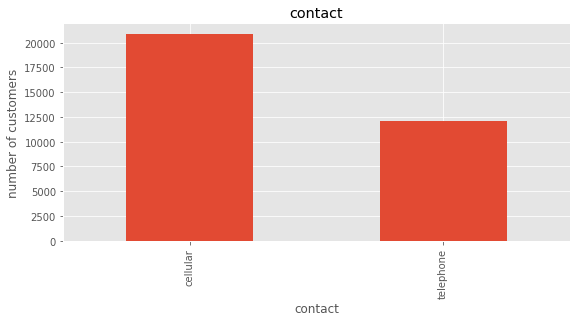

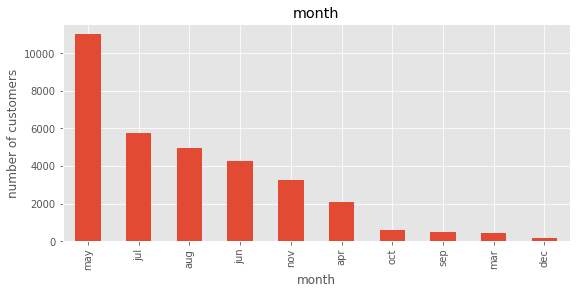

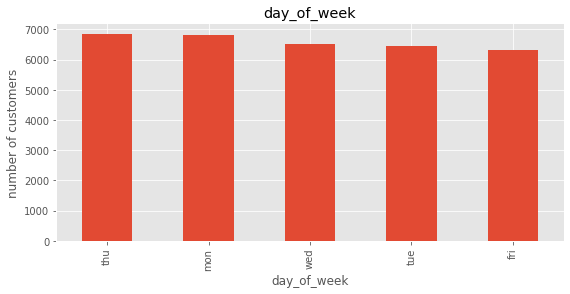

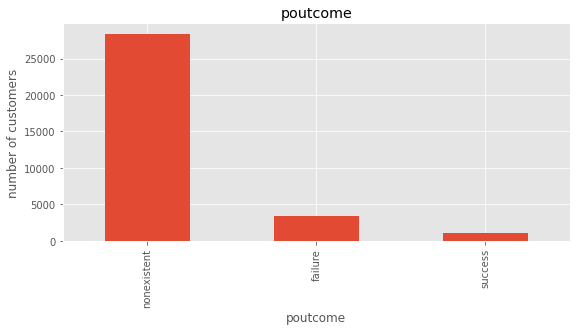

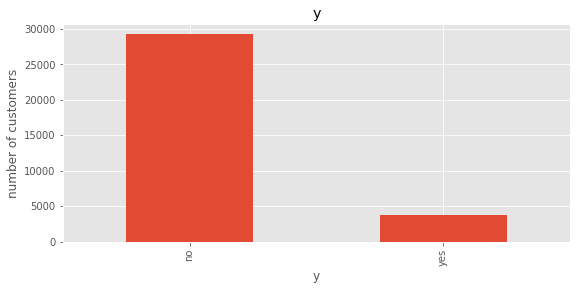

In [14]:
for column in cat_features:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    data[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)

In [15]:
print(data.isnull().sum())

age               0
job             265
marital          65
education      1397
default        6940
housing         796
loan            796
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
dtype: int64


**Removing Outliers from Age, Duration, Campaign**

---

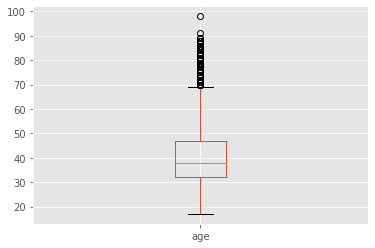

In [16]:
data.boxplot('age')

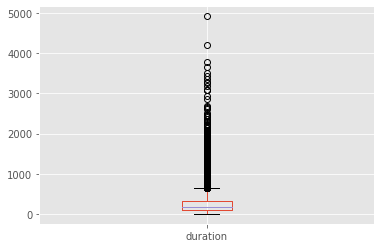

In [17]:
data.boxplot('duration')

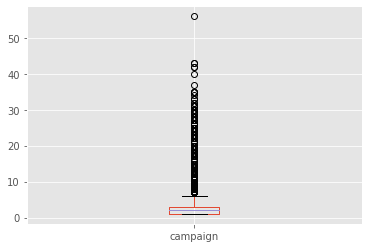

In [18]:
data.boxplot('campaign')

**According to the box plot of the Data columns Age, Duration, Campaign it is observed that there are outliers in all the columns. So we'll remove the outliers.**

In [19]:
numeric_col = [['age'], ['duration'], ['campaign']]
for i in numeric_col:
  for x in i:
        q75,q25 = np.percentile(data.loc[:,x],[75,25])
        intr_qr = q75-q25
    
        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
    
        data.loc[data[x] < min,x] = np.nan
        data.loc[data[x] > max,x] = np.nan

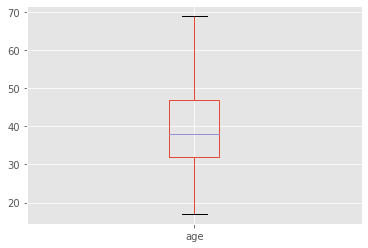

In [20]:
data.boxplot('age')

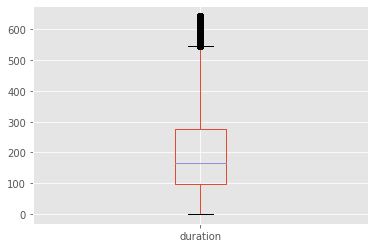

In [21]:

data.boxplot('duration')

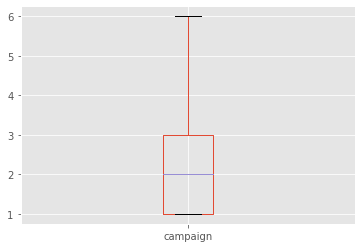

In [22]:
data.boxplot('campaign')

**Removing Null Values**

---

In [23]:
data.isnull().sum()

age             368
job             265
marital          65
education      1397
default        6940
housing         796
loan            796
contact           0
month             0
day_of_week       0
duration       2366
campaign       1916
pdays             0
previous          0
poutcome          0
y                 0
dtype: int64

In [24]:
lis = []
for i in range(0, data.shape[1]):
     
    if(data.iloc[:,i].dtypes == 'object'):
        data.iloc[:,i] = pd.Categorical(data.iloc[:,i])
        data.iloc[:,i] = data.iloc[:,i].cat.codes 
        data.iloc[:,i] = data.iloc[:,i].astype('object')
         
        lis.append(data.columns[i])

**Replacing the outliers NaN values with KNN Imputer**

---



In [25]:
data = pd.DataFrame(KNNImputer(n_neighbors = 3).fit_transform(data), columns = data.columns)

In [26]:
print("count of NULL values after imputation\n")
data.isnull().sum()

count of NULL values after imputation



age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [27]:
print(data)

        age  job  marital  education  default  housing  loan  contact  month  \
0      49.0  1.0      1.0        2.0     -1.0      0.0   0.0      0.0    7.0   
1      37.0  2.0      1.0        6.0      0.0      0.0   0.0      1.0    7.0   
2      58.0  5.0      1.0        0.0      0.0      0.0   0.0      0.0    3.0   
3      36.0  0.0      1.0        6.0      0.0      1.0   0.0      1.0    6.0   
4      59.0  5.0      0.0        6.0      0.0      0.0   0.0      0.0    4.0   
...     ...  ...      ...        ...      ...      ...   ...      ...    ...   
32945  28.0  7.0      2.0        3.0      0.0      1.0   0.0      0.0    3.0   
32946  52.0  9.0      1.0        5.0      0.0      1.0   0.0      0.0    7.0   
32947  54.0  0.0      1.0        2.0      0.0      0.0   1.0      0.0    3.0   
32948  29.0  0.0      1.0        6.0      0.0      0.0   0.0      1.0    6.0   
32949  35.0  0.0      1.0        6.0      0.0      0.0   1.0      1.0    4.0   

       day_of_week  duration  campaign 

**Label Encoding for columns with object values**

---

In [28]:
le = LabelEncoder()
for col in data.select_dtypes(include='O').columns:
    data[col]=le.fit_transform(data[col])
for col in data.columns:
    data[col]=data[col].astype(int)

In [29]:
print(data)

       age  job  marital  education  default  housing  loan  contact  month  \
0       49    1        1          2       -1        0     0        0      7   
1       37    2        1          6        0        0     0        1      7   
2       58    5        1          0        0        0     0        0      3   
3       36    0        1          6        0        1     0        1      6   
4       59    5        0          6        0        0     0        0      4   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
32945   28    7        2          3        0        1     0        0      3   
32946   52    9        1          5        0        1     0        0      7   
32947   54    0        1          2        0        0     1        0      3   
32948   29    0        1          6        0        0     0        1      6   
32949   35    0        1          6        0        0     1        1      4   

       day_of_week  duration  campaign  pdays  prev

**Input feature Corelation Plot and Heat Map**

---

In [30]:
data.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.025111,-0.394708,-0.143690,-0.189362,-0.005039,-0.004517,0.025654,-0.032884,-0.018858,0.004026,0.003855,0.001643,-0.014474,0.016418,-0.006814
job,-0.025111,1.000000,0.027784,0.121021,0.046871,0.007811,-0.013081,-0.031858,-0.027512,-0.002371,-0.006704,-0.005920,-0.028764,0.025027,0.005968,0.025523
marital,-0.394708,0.027784,1.000000,0.101118,0.080382,0.019817,0.008890,-0.052164,-0.006396,0.002662,0.000077,-0.004438,-0.040431,0.038183,0.004985,0.047592
education,-0.143690,0.121021,0.101118,1.000000,0.218486,0.025848,0.014793,-0.116254,-0.077212,-0.001950,-0.026597,-0.001405,-0.028621,0.023340,0.009656,0.039757
default,-0.189362,0.046871,0.080382,0.218486,1.000000,0.019196,0.006305,-0.137318,0.019475,0.015717,0.016831,-0.028037,-0.081407,0.106608,-0.027023,0.098950
housing,-0.005039,0.007811,0.019817,0.025848,0.019196,1.000000,0.229756,-0.085593,-0.022458,0.006469,-0.005842,-0.004804,-0.014013,0.023659,-0.011016,0.008772
loan,-0.004517,-0.013081,0.008890,0.014793,0.006305,0.229756,1.000000,-0.023121,-0.012379,-0.009332,-0.005731,0.013949,0.000108,-0.002665,-0.000388,-0.000526
contact,0.025654,-0.031858,-0.052164,-0.116254,-0.137318,-0.085593,-0.023121,1.000000,0.275416,-0.007182,-0.031642,0.037928,0.116561,-0.212673,0.121541,-0.143238
month,-0.032884,-0.027512,-0.006396,-0.077212,0.019475,-0.022458,-0.012379,0.275416,1.000000,0.023675,0.012720,-0.042508,-0.047776,0.103726,-0.065620,-0.007508
day_of_week,-0.018858,-0.002371,0.002662,-0.001950,0.015717,0.006469,-0.009332,-0.007182,0.023675,1.000000,0.035106,-0.051774,-0.005215,-0.004263,0.014240,0.011926


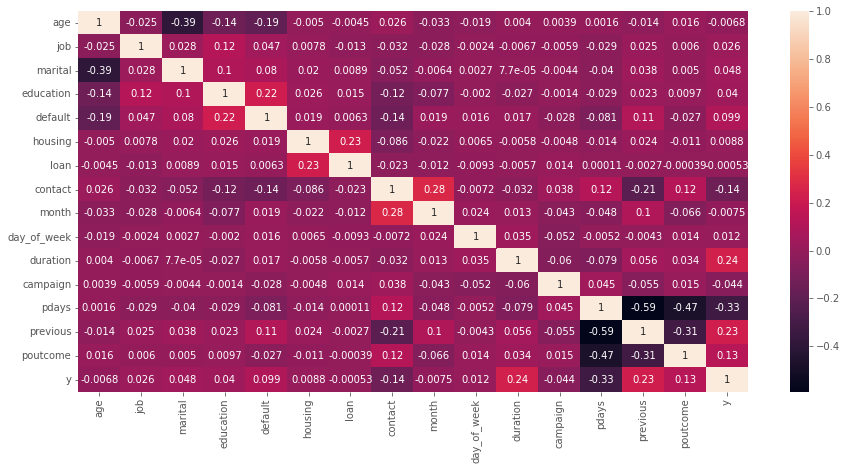

In [31]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True)

**Splitting of X_train and y_train for training, X_test and y_test for testing**

In [32]:
X, y = data.iloc[:,:-1], data.iloc[:,-1]

In [33]:
print(X)
print(y)

       age  job  marital  education  default  housing  loan  contact  month  \
0       49    1        1          2       -1        0     0        0      7   
1       37    2        1          6        0        0     0        1      7   
2       58    5        1          0        0        0     0        0      3   
3       36    0        1          6        0        1     0        1      6   
4       59    5        0          6        0        0     0        0      4   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
32945   28    7        2          3        0        1     0        0      3   
32946   52    9        1          5        0        1     0        0      7   
32947   54    0        1          2        0        0     1        0      3   
32948   29    0        1          6        0        0     0        1      6   
32949   35    0        1          6        0        0     1        1      4   

       day_of_week  duration  campaign  pdays  prev

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'target variable')

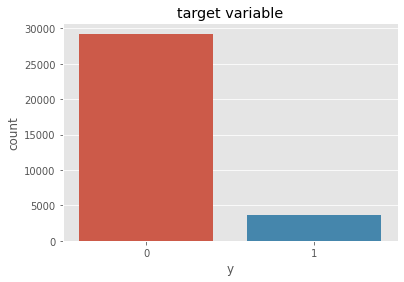

In [34]:
sns.countplot(y)
plt.title("target variable")

In [35]:
y.value_counts()

0    29238
1     3712
Name: y, dtype: int64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.30, random_state=42)

**Declaring the models**

---

In [37]:
seed=0

dt=DecisionTreeClassifier(random_state=seed)
rf=RandomForestClassifier(random_state=seed)
lr=LogisticRegression(random_state=seed)
svc=SVC(random_state=seed)
knn=KNeighborsClassifier()

**Multinomial Naive Bayes Model**

---

In [92]:
clf = GaussianNB()
clf.fit(X_train, y_train)  
pred = clf.predict(X_test)

In [93]:
accuracy_score_NB = accuracy_score(y_test, pred)
confusion_matrix_NB = confusion_matrix(y_test, pred)
roc_auc_score_NB = roc_auc_score(y_test, pred)
f1_score_NB = f1_score(y_test,pred)
mean_absolute_error_NB = mean_absolute_error(y_test,pred)
mean_squared_error_NB = mean_squared_error(y_test,pred)

In [94]:
print('Accuracy:')
print(accuracy_score_NB)
print('\n')
print('Confusion Matrix:')
print(confusion_matrix_NB)
print('\n')
print('AUC Score:')
print(roc_auc_score_NB)
print('\n')
print('F1-Score:')
print(f1_score_NB)
print('\n')
print('Mean Absolute Error:')
print(mean_absolute_error_NB)
print('\n')
print('Mean Squared Error:')
print(mean_squared_error_NB)

Accuracy:
0.8603945371775418


Confusion Matrix:
[[8135  588]
 [ 792  370]]


AUC Score:
0.6255042607007845


F1-Score:
0.34905660377358494


Mean Absolute Error:
0.13960546282245828


Mean Squared Error:
0.13960546282245828


**K-Nearest Neighbor Model**

---

In [41]:
knn.fit(X_train, y_train)  
pred = knn.predict(X_test)

In [42]:
accuracy_score_KNN = accuracy_score(y_test, pred)
confusion_matrix_KNN = confusion_matrix(y_test, pred)
roc_auc_score_KNN = roc_auc_score(y_test, pred)
f1_score_KNN = f1_score(y_test,pred)
mean_absolute_error_KNN = mean_absolute_error(y_test,pred)
mean_squared_error_KNN = mean_squared_error(y_test,pred)

In [43]:
print('Accuracy:')
print(accuracy_score_KNN)
print('\n')
print('Confusion Matrix:')
print(confusion_matrix_KNN)
print('\n')
print('AUC Score:')
print(roc_auc_score_KNN)
print('\n')
print('F1-Score:')
print(f1_score_KNN)
print('\n')
print('Mean Absolute Error:')
print(mean_absolute_error_KNN)
print('\n')
print('Mean Squared Error:')
print(mean_squared_error_KNN)

Accuracy:
0.8882144663631766


Confusion Matrix:
[[8532  191]
 [ 914  248]]


AUC Score:
0.5957644962187724


F1-Score:
0.3098063710181137


Mean Absolute Error:
0.11178553363682348


Mean Squared Error:
0.11178553363682348


**Decision Tree Clasifier Model**

---

In [44]:
dt=DecisionTreeClassifier(random_state=seed)
dt.fit(X_train, y_train)  
pred = dt.predict(X_test)

In [45]:
accuracy_score_DT = accuracy_score(y_test, pred)
confusion_matrix_DT = confusion_matrix(y_test, pred)
roc_auc_score_DT = roc_auc_score(y_test, pred)
f1_score_DT = f1_score(y_test,pred)
mean_absolute_error_DT = mean_absolute_error(y_test,pred)
mean_squared_error_DT = mean_squared_error(y_test,pred)

In [46]:
print('Accuracy:')
print(accuracy_score_DT)
print('\n')
print('Confusion Matrix:')
print(confusion_matrix_DT)
print('\n')
print('AUC Score:')
print(roc_auc_score_DT)
print('\n')
print('F1-Score:')
print(f1_score_DT)
print('\n')
print('Mean Absolute Error:')
print(mean_absolute_error_DT)
print('\n')
print('Mean Squared Error:')
print(mean_squared_error_DT)

Accuracy:
0.836722306525038


Confusion Matrix:
[[7859  864]
 [ 750  412]]


AUC Score:
0.6277563045289689


F1-Score:
0.33798195242001644


Mean Absolute Error:
0.16327769347496207


Mean Squared Error:
0.16327769347496207


**Random Forest Classifier Model**

---

In [47]:
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

In [48]:
accuracy_score_RF = accuracy_score(y_test, pred)
confusion_matrix_RF = confusion_matrix(y_test, pred)
roc_auc_score_RF = roc_auc_score(y_test, pred)
f1_score_RF = f1_score(y_test,pred)
mean_absolute_error_RF = mean_absolute_error(y_test,pred)
mean_squared_error_RF = mean_squared_error(y_test,pred)

In [49]:
print('Accuracy:')
print(accuracy_score_RF)
print('\n')
print('Confusion Matrix:')
print(confusion_matrix_RF)
print('\n')
print('AUC Score:')
print(roc_auc_score_RF)
print('\n')
print('F1-Score:')
print(f1_score_RF)
print('\n')
print('Mean Absolute Error:')
print(mean_absolute_error_RF)
print('\n')
print('Mean Squared Error:')
print(mean_squared_error_RF)

Accuracy:
0.8990389479008599


Confusion Matrix:
[[8597  126]
 [ 872  290]]


AUC Score:
0.617562567789706


F1-Score:
0.367553865652725


Mean Absolute Error:
0.10096105209914011


Mean Squared Error:
0.10096105209914011


**Logistic Regression Model**

---

In [50]:
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
accuracy_score_LR = accuracy_score(y_test, pred)
confusion_matrix_LR = confusion_matrix(y_test, pred)
roc_auc_score_LR = roc_auc_score(y_test, pred)
f1_score_LR = f1_score(y_test,pred)
mean_absolute_error_LR = mean_absolute_error(y_test,pred)
mean_squared_error_LR = mean_squared_error(y_test,pred)

In [52]:
print('Accuracy:')
print(accuracy_score_LR)
print('\n')
print('Confusion Matrix:')
print(confusion_matrix_LR)
print('\n')
print('AUC Score:')
print(roc_auc_score_LR)
print('\n')
print('F1-Score:')
print(f1_score_LR)
print('\n')
print('Mean Absolute Error:')
print(mean_absolute_error_LR)
print('\n')
print('Mean Squared Error:')
print(mean_squared_error_LR)

Accuracy:
0.894790085988872


Confusion Matrix:
[[8614  109]
 [ 931  231]]


AUC Score:
0.5931497398513003


F1-Score:
0.30758988015978694


Mean Absolute Error:
0.10520991401112798


Mean Squared Error:
0.10520991401112798


**SVM Model**

---

In [53]:
svc.fit(X_train, y_train)
pred = svc.predict(X_test)

In [54]:
accuracy_score_SVM = accuracy_score(y_test, pred)
confusion_matrix_SVM = confusion_matrix(y_test, pred)
roc_auc_score_SVM = roc_auc_score(y_test, pred)
f1_score_SVM = f1_score(y_test,pred)
mean_absolute_error_SVM = mean_absolute_error(y_test,pred)
mean_squared_error_SVM = mean_squared_error(y_test,pred)

In [55]:
print('Accuracy:')
print(accuracy_score_SVM)
print('\n')
print('Confusion Matrix:')
print(confusion_matrix_SVM)
print('\n')
print('AUC Score:')
print(roc_auc_score_SVM)
print('\n')
print('F1-Score:')
print(f1_score_SVM)
print('\n')
print('Mean Absolute Error:')
print(mean_absolute_error_SVM)
print('\n')
print('Mean Squared Error:')
print(mean_squared_error_SVM)

Accuracy:
0.896206373292868


Confusion Matrix:
[[8610  113]
 [ 913  249]]


AUC Score:
0.600665727714908


F1-Score:
0.32677165354330706


Mean Absolute Error:
0.10379362670713202


Mean Squared Error:
0.10379362670713202


**MultiLayer Perceptron Model**

---

In [56]:
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
mlp.fit(X_train, y_train)
pred = mlp.predict(X_test)

In [57]:
accuracy_score_MLP = accuracy_score(y_test, pred)
confusion_matrix_MLP = confusion_matrix(y_test, pred)
roc_auc_score_MLP = roc_auc_score(y_test, pred)
f1_score_MLP = f1_score(y_test,pred)
mean_absolute_error_MLP = mean_absolute_error(y_test,pred)
mean_squared_error_MLP = mean_squared_error(y_test,pred)

In [58]:
print('Accuracy:')
print(accuracy_score_MLP)
print('\n')
print('Confusion Matrix:')
print(confusion_matrix_MLP)
print('\n')
print('AUC Score:')
print(roc_auc_score_MLP)
print('\n')
print('F1-Score:')
print(f1_score_MLP)
print('\n')
print('Mean Absolute Error:')
print(mean_absolute_error_MLP)
print('\n')
print('Mean Squared Error:')
print(mean_squared_error_MLP)

Accuracy:
0.890642387455741


Confusion Matrix:
[[8523  200]
 [ 881  281]]


AUC Score:
0.6094482744196352


F1-Score:
0.34205721241631165


Mean Absolute Error:
0.10935761254425898


Mean Squared Error:
0.10935761254425898


**ANN Model**

---

In [88]:
import tensorflow as tf

classifier = Sequential()
classifier.add(Dense(50, activation='relu', input_shape=(X_train.shape[1], ), kernel_initializer='normal'))
classifier.add(Dense(50, activation='relu', kernel_initializer='normal'))
classifier.add(Dense(50, activation='relu', kernel_initializer='normal'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))
classifier.compile(optimizer='sgd', loss='binary_crossentropy', metrics=[tf.keras.metrics.MeanSquaredError(name='mse'),
    'accuracy',tf.keras.metrics.MeanAbsoluteError(name='mae'),
    tf.keras.metrics.TruePositives(name='TruePositives'),tf.keras.metrics.TrueNegatives(name='TrueNegatives'),
    tf.keras.metrics.FalseNegatives(name='FalseNegatives'),tf.keras.metrics.FalsePositives(name='FalsePositves'),
    tf.keras.metrics.AUC(name='AUC'), tf.keras.metrics.Precision(name='Precision'),
    tf.keras.metrics.Recall(name='Recall'),])
model_ann = classifier.fit(X_train,y_train,epochs=20,batch_size=10,validation_split=0.2,verbose=1)
classifier.evaluate(X_test, y_test)

Epoch 1/20
1846/1846 [==============================] - 8s 3ms/step - loss: 0.3084 - mse: 0.0903 - accuracy: 0.8984 - mae: 0.1823 - TruePositives: 162.5211 - TrueNegatives: 8126.2437 - FalseNegatives: 850.0379 - FalsePositves: 96.1928 - AUC: 0.6797 - Precision: 0.5984 - Recall: 0.1364 - val_loss: 0.2975 - val_mse: 0.0865 - val_accuracy: 0.8996 - val_mae: 0.1713 - val_TruePositives: 433.3506 - val_TrueNegatives: 18216.4238 - val_FalseNegatives: 1865.5520 - val_FalsePositves: 251.6580 - val_AUC: 0.7191 - val_Precision: 0.6326 - val_Recall: 0.1884
Epoch 2/20
1846/1846 [==============================] - 6s 3ms/step - loss: 0.3013 - mse: 0.0862 - accuracy: 0.9004 - mae: 0.1696 - TruePositives: 695.3981 - TrueNegatives: 28324.2383 - FalseNegatives: 2889.7292 - FalsePositves: 390.5661 - AUC: 0.7271 - Precision: 0.6401 - Recall: 0.1939 - val_loss: 0.2969 - val_mse: 0.0856 - val_accuracy: 0.8996 - val_mae: 0.1682 - val_TruePositives: 950.3506 - val_TrueNegatives: 38464.4258 - val_FalseNegatives

[0.3047735095024109,
 0.08419672399759293,
 0.8965098857879639,
 0.1707700788974762,
 9376.5244140625,
 411054.71875,
 42217.42578125,
 3611.281494140625,
 0.7478567361831665,
 0.7219472527503967,
 0.18173682689666748]

**Visualizing Accuracy of all the Models**

---

Accuracy of ANN is: 0.8975214958190918
Accuracy of MLP is: 0.890642387455741
Accuracy of SVM is: 0.896206373292868
Accuracy of NB is: 0.8603945371775418
Accuracy of KNN is: 0.8882144663631766
Accuracy of LR is: 0.894790085988872
Accuracy of RF is: 0.8990389479008599
Accuracy of DT is: 0.836722306525038




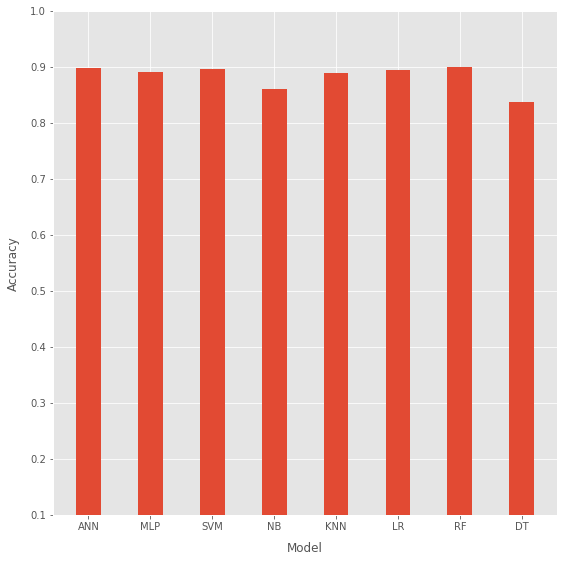

In [95]:
fig_a = plt.figure(figsize=[7,7])
ax_a = fig_a.add_axes([0,0,1,1])

accuracy_vals=[accuracy_ann[2],  accuracy_score_MLP,  accuracy_score_SVM,  accuracy_score_NB,  accuracy_score_KNN,  accuracy_score_LR, accuracy_score_RF,  accuracy_score_DT]
accuracy_labels=['ANN','MLP','SVM','NB','KNN','LR','RF', 'DT']

for i,j in zip(accuracy_vals, accuracy_labels):
  print("Accuracy of "+ j +" is: "+ str(i) )

print('\n')
ax_a.bar(accuracy_labels,accuracy_vals,width=0.4,align='center')
plt.ylabel("Accuracy", labelpad=10)
plt.xlabel("Model", labelpad=10)
plt.ylim([0.1,1.0])
plt.show()